In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 18})
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import pandas as pd 
import random

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv('./Itr_6.csv')
data.shape

(101, 97)

In [3]:
data_t = data.iloc[:,1:97].T
data_t

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
A1,0.054,0.053,0.053,0.052,0.052,0.052,0.052,0.051,0.051,0.050,...,0.062,0.063,0.064,0.066,0.068,0.066,0.070,0.068,0.069,0.070
A2,0.323,0.319,0.316,0.313,0.310,0.309,0.307,0.305,0.304,0.302,...,0.126,0.121,0.116,0.113,0.110,0.105,0.104,0.100,0.098,0.097
A3,0.043,0.043,0.043,0.042,0.042,0.042,0.041,0.041,0.041,0.040,...,0.050,0.051,0.052,0.054,0.056,0.055,0.056,0.056,0.057,0.058
A4,0.541,0.535,0.530,0.526,0.522,0.519,0.517,0.514,0.512,0.511,...,0.101,0.099,0.097,0.096,0.096,0.093,0.092,0.090,0.089,0.089
A5,0.372,0.368,0.365,0.361,0.358,0.356,0.353,0.350,0.348,0.346,...,0.113,0.109,0.106,0.104,0.102,0.098,0.096,0.094,0.092,0.091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H8,0.512,0.506,0.501,0.496,0.492,0.489,0.485,0.482,0.480,0.478,...,0.379,0.351,0.325,0.302,0.282,0.260,0.246,0.227,0.213,0.201
H9,0.524,0.518,0.513,0.508,0.504,0.500,0.497,0.494,0.492,0.490,...,0.359,0.334,0.310,0.290,0.271,0.249,0.240,0.222,0.208,0.197
H10,0.401,0.397,0.393,0.390,0.387,0.385,0.383,0.381,0.380,0.378,...,0.199,0.189,0.180,0.172,0.165,0.156,0.151,0.143,0.138,0.134
H11,0.445,0.440,0.436,0.432,0.428,0.425,0.423,0.421,0.419,0.417,...,0.258,0.242,0.228,0.216,0.205,0.191,0.184,0.173,0.165,0.158


In [4]:
ind = []

for i in range(1, 9):
    for j in range(1,13):
        ind.append(i*100+j)

In [5]:
w = data['Wavelength']

In [6]:
data1 = data.transpose()

In [7]:
data2 = data1.rename(columns = w)

In [8]:
data3 = data2.drop(index = 'Wavelength')

In [9]:
data3['index'] = ind
data3

,400,405,410,415,420,425,430,435,440,445,...,860,865,870,875,880,885,890,895,900,index
A1,0.054,0.053,0.053,0.052,0.052,0.052,0.052,0.051,0.051,0.050,...,0.063,0.064,0.066,0.068,0.066,0.070,0.068,0.069,0.070,101
A2,0.323,0.319,0.316,0.313,0.310,0.309,0.307,0.305,0.304,0.302,...,0.121,0.116,0.113,0.110,0.105,0.104,0.100,0.098,0.097,102
A3,0.043,0.043,0.043,0.042,0.042,0.042,0.041,0.041,0.041,0.040,...,0.051,0.052,0.054,0.056,0.055,0.056,0.056,0.057,0.058,103
A4,0.541,0.535,0.530,0.526,0.522,0.519,0.517,0.514,0.512,0.511,...,0.099,0.097,0.096,0.096,0.093,0.092,0.090,0.089,0.089,104
A5,0.372,0.368,0.365,0.361,0.358,0.356,0.353,0.350,0.348,0.346,...,0.109,0.106,0.104,0.102,0.098,0.096,0.094,0.092,0.091,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H8,0.512,0.506,0.501,0.496,0.492,0.489,0.485,0.482,0.480,0.478,...,0.351,0.325,0.302,0.282,0.260,0.246,0.227,0.213,0.201,808
H9,0.524,0.518,0.513,0.508,0.504,0.500,0.497,0.494,0.492,0.490,...,0.334,0.310,0.290,0.271,0.249,0.240,0.222,0.208,0.197,809
H10,0.401,0.397,0.393,0.390,0.387,0.385,0.383,0.381,0.380,0.378,...,0.189,0.180,0.172,0.165,0.156,0.151,0.143,0.138,0.134,810
H11,0.445,0.440,0.436,0.432,0.428,0.425,0.423,0.421,0.419,0.417,...,0.242,0.228,0.216,0.205,0.191,0.184,0.173,0.165,0.158,811


# T-PCA

In [38]:
sca = StandardScaler()
sca.fit(data_t)
X_scal = sca.transform(data_t)
pca = PCA(n_components=4)


# Fit the PCA object to ... ?
pca.fit(X_scal)

# Print the PCA components and explained variance
# print(pca.components_)
# print("")
print(pca.explained_variance_[0])

77.48670606419853


In [39]:
pca1 = pca.components_[0,:]
pca2 = pca.components_[1,:]
pca3 = pca.components_[2,:]
pca4 = pca.components_[3,:]
pca1.shape

(101,)

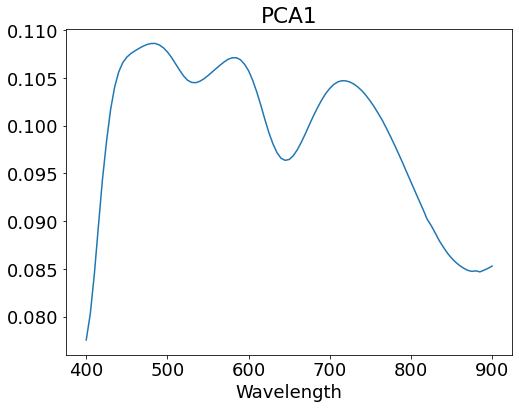

In [40]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(400,905,5), pca1)
plt.title('PCA1')
plt.xlabel('Wavelength');

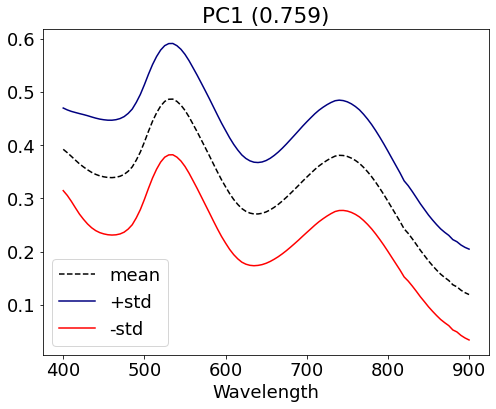

In [47]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(400,905,5), data_t.mean().values, label='mean', c='black', ls='--')
plt.plot(np.arange(400,905,5), data_t.mean().values + pca1, label='+std', c='navy')
plt.plot(np.arange(400,905,5), data_t.mean().values - pca1, label='-std', c='red')
plt.title(f'PC1 ({pca.explained_variance_ratio_[0].round(3)})')
plt.legend()
plt.xlabel('Wavelength');

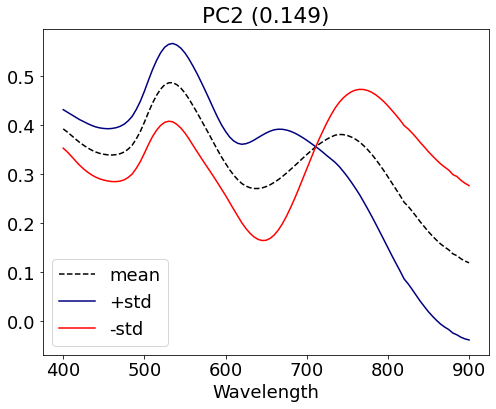

In [48]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(400,905,5), data_t.mean().values, label='mean', c='black', ls='--')
plt.plot(np.arange(400,905,5), data_t.mean().values + pca2, label='+std', c='navy')
plt.plot(np.arange(400,905,5), data_t.mean().values - pca2, label='-std', c='red')
plt.title(f'PC2 ({pca.explained_variance_ratio_[1].round(3)})')
plt.legend()
plt.xlabel('Wavelength');

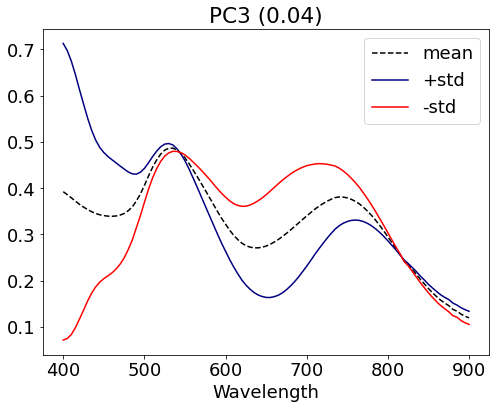

In [51]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(400,905,5), data_t.mean().values, label='mean', c='black', ls='--')
plt.plot(np.arange(400,905,5), data_t.mean().values + pca3, label='+std', c='navy')
plt.plot(np.arange(400,905,5), data_t.mean().values - pca3, label='-std', c='red')
plt.title(f'PC3 ({pca.explained_variance_ratio_[2].round(3)})')
plt.legend()
plt.xlabel('Wavelength');

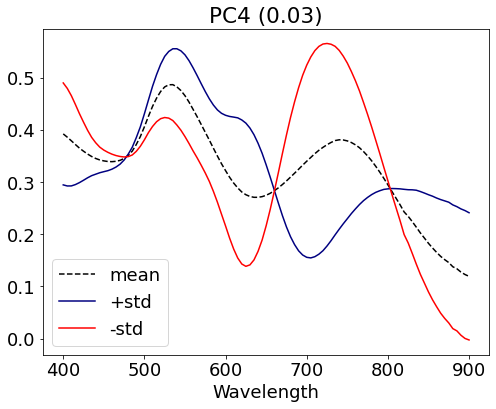

In [52]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(400,905,5), data_t.mean().values, label='mean', c='black', ls='--')
plt.plot(np.arange(400,905,5), data_t.mean().values + pca4, label='+std', c='navy')
plt.plot(np.arange(400,905,5), data_t.mean().values - pca4, label='-std', c='red')
plt.title(f'PC4 ({pca.explained_variance_ratio_[3].round(3)})')
plt.legend()
plt.xlabel('Wavelength');

# Gernal PCA

In [14]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(data3)

X = data3
y = data3['index']

df = pd.DataFrame(X)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

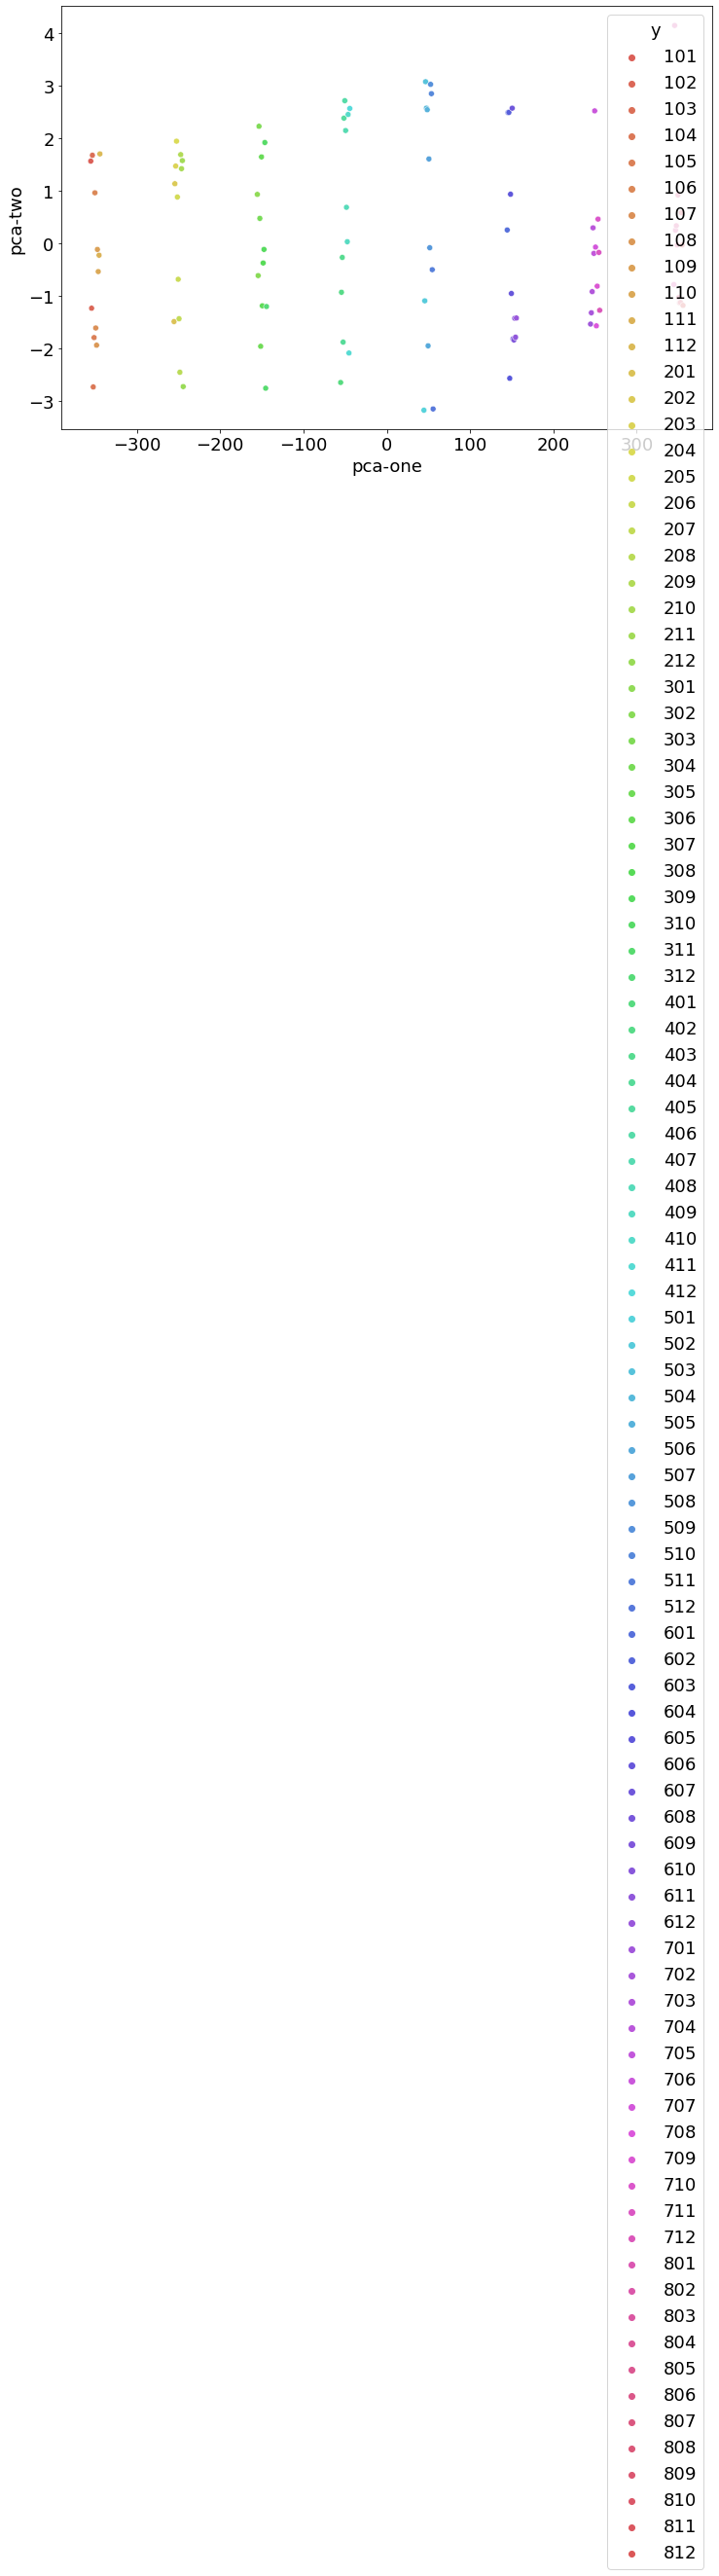

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 96),
    data=df,
    alpha=1
)

/tmp/ipykernel_412/2145692067.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(12,8)).gca(projection='3d')


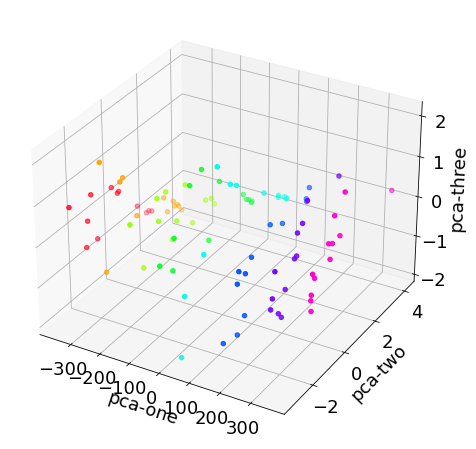

In [16]:
ax = plt.figure(figsize=(12,8)).gca(projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
    c=df["y"], 
    cmap='gist_rainbow'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# 2 dimension

In [17]:
df_subset = df.copy()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 


tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_subset)

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 95 nearest neighbors...
[t-SNE] Indexed 96 samples in 0.000s...
[t-SNE] Computed neighbors for 96 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 96 / 96
[t-SNE] Mean sigma: 352.359181
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.170368
[t-SNE] KL divergence after 300 iterations: 0.229075


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

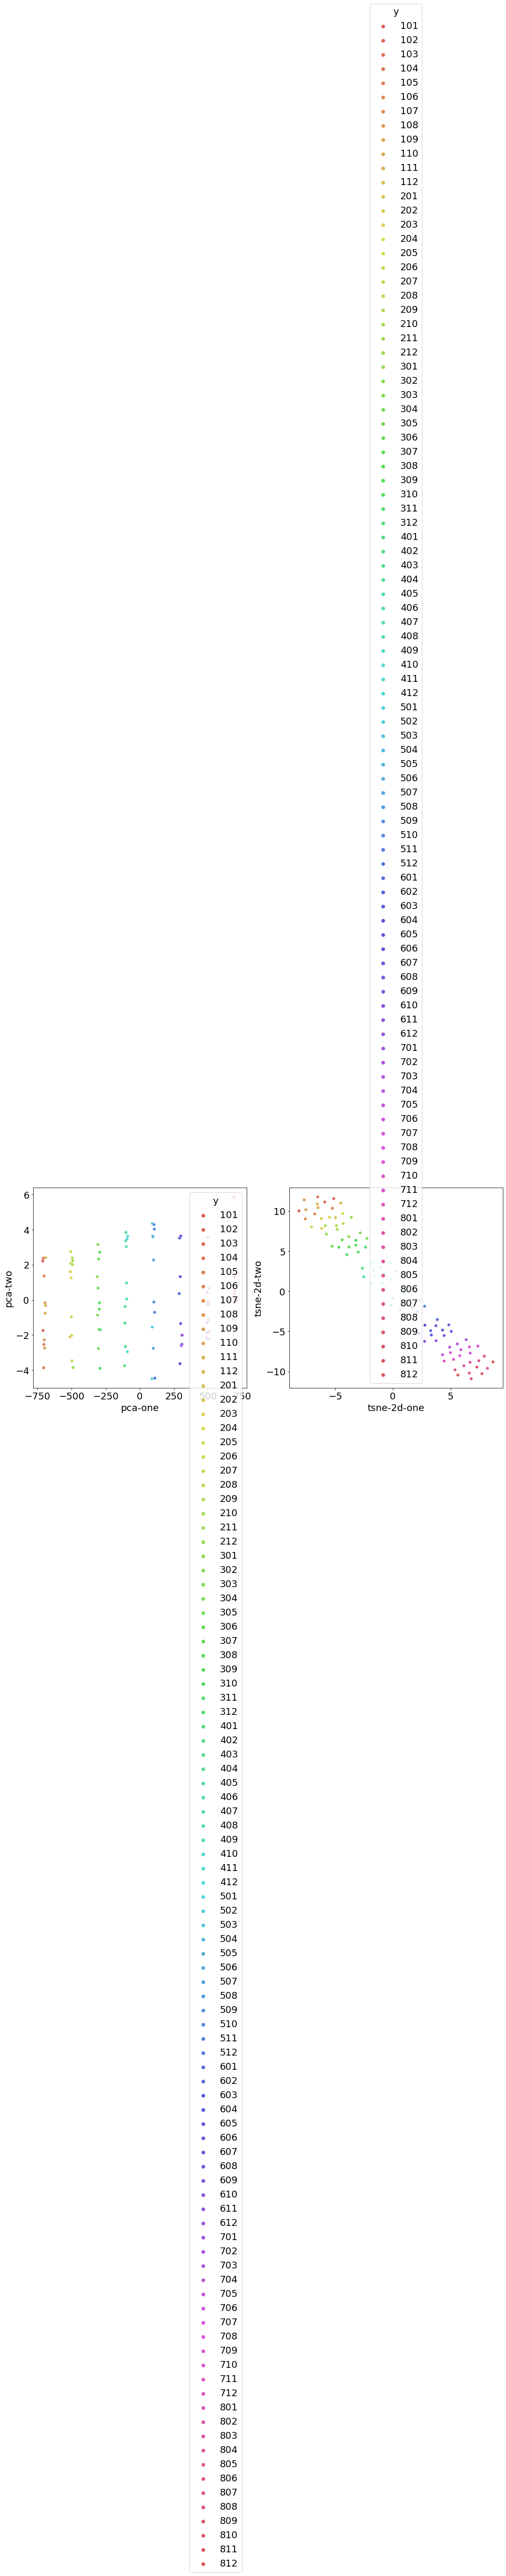

In [18]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 96),
    data=df_subset,
    legend="full",
    alpha=1,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 96),
    data=df_subset,
    alpha=1,
    ax=ax2
)

# 5 dimension

In [19]:
df_subset = df.copy()

pca = PCA(n_components=5)
pca_result = pca.fit_transform(df_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_subset)

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 95 nearest neighbors...
[t-SNE] Indexed 96 samples in 0.000s...
[t-SNE] Computed neighbors for 96 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 96 / 96
[t-SNE] Mean sigma: 352.359336
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.815353
[t-SNE] KL divergence after 300 iterations: 0.288842


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

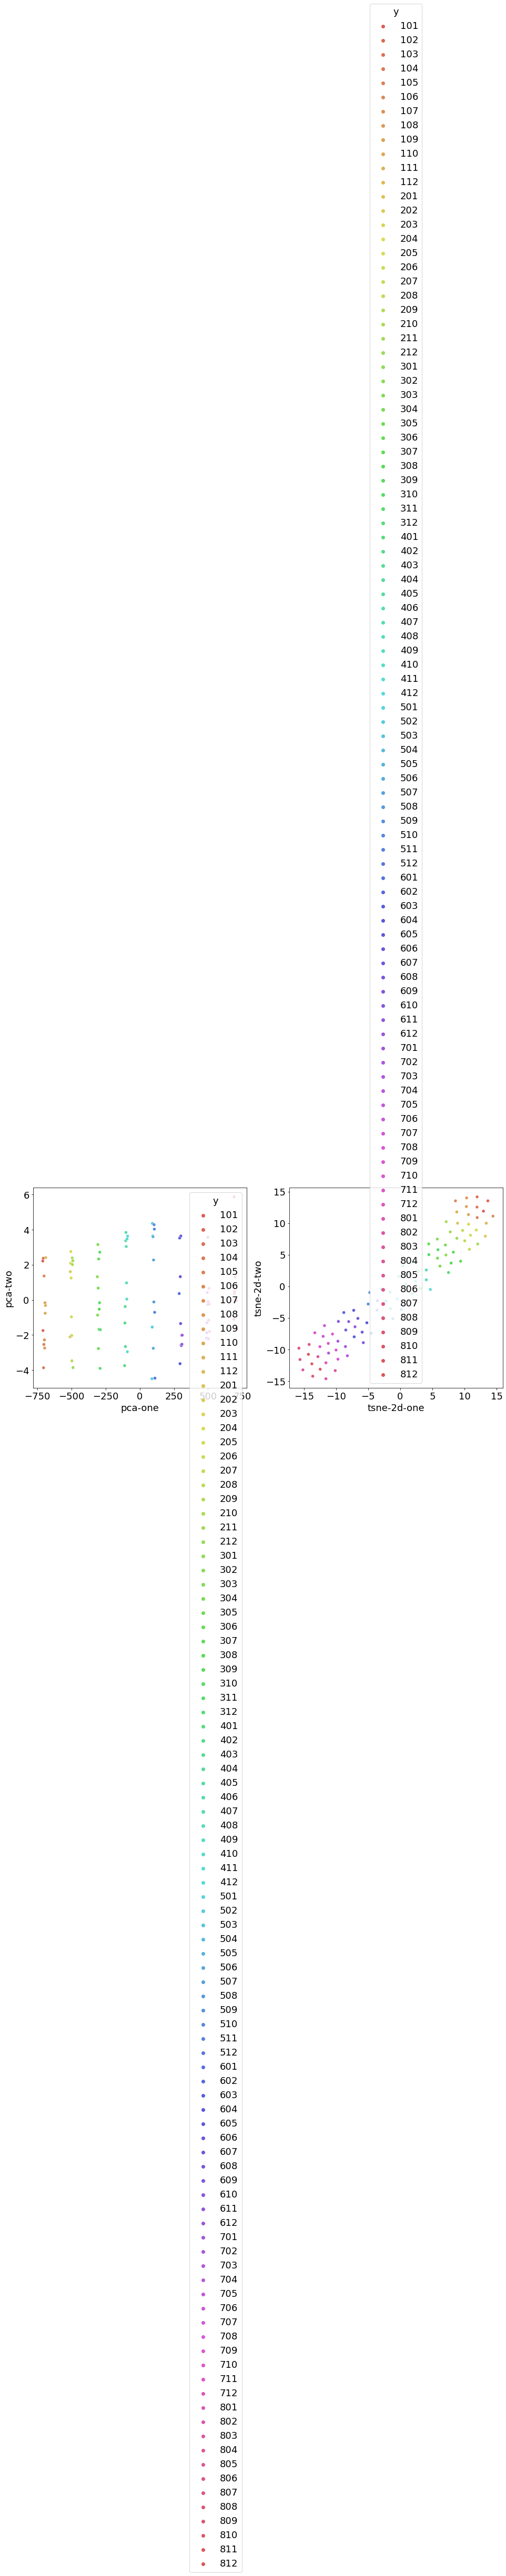

In [20]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 96),
    data=df_subset,
    alpha=1,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 96),
    data=df_subset,
    alpha=1,
    ax=ax2
)

# 10 dimesion

In [21]:
df_subset = df.copy()

pca = PCA(n_components=10)
pca_result = pca.fit_transform(df_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_subset)

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 95 nearest neighbors...
[t-SNE] Indexed 96 samples in 0.000s...
[t-SNE] Computed neighbors for 96 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 96 / 96
[t-SNE] Mean sigma: 352.359336
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.522865
[t-SNE] KL divergence after 300 iterations: 0.320250


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

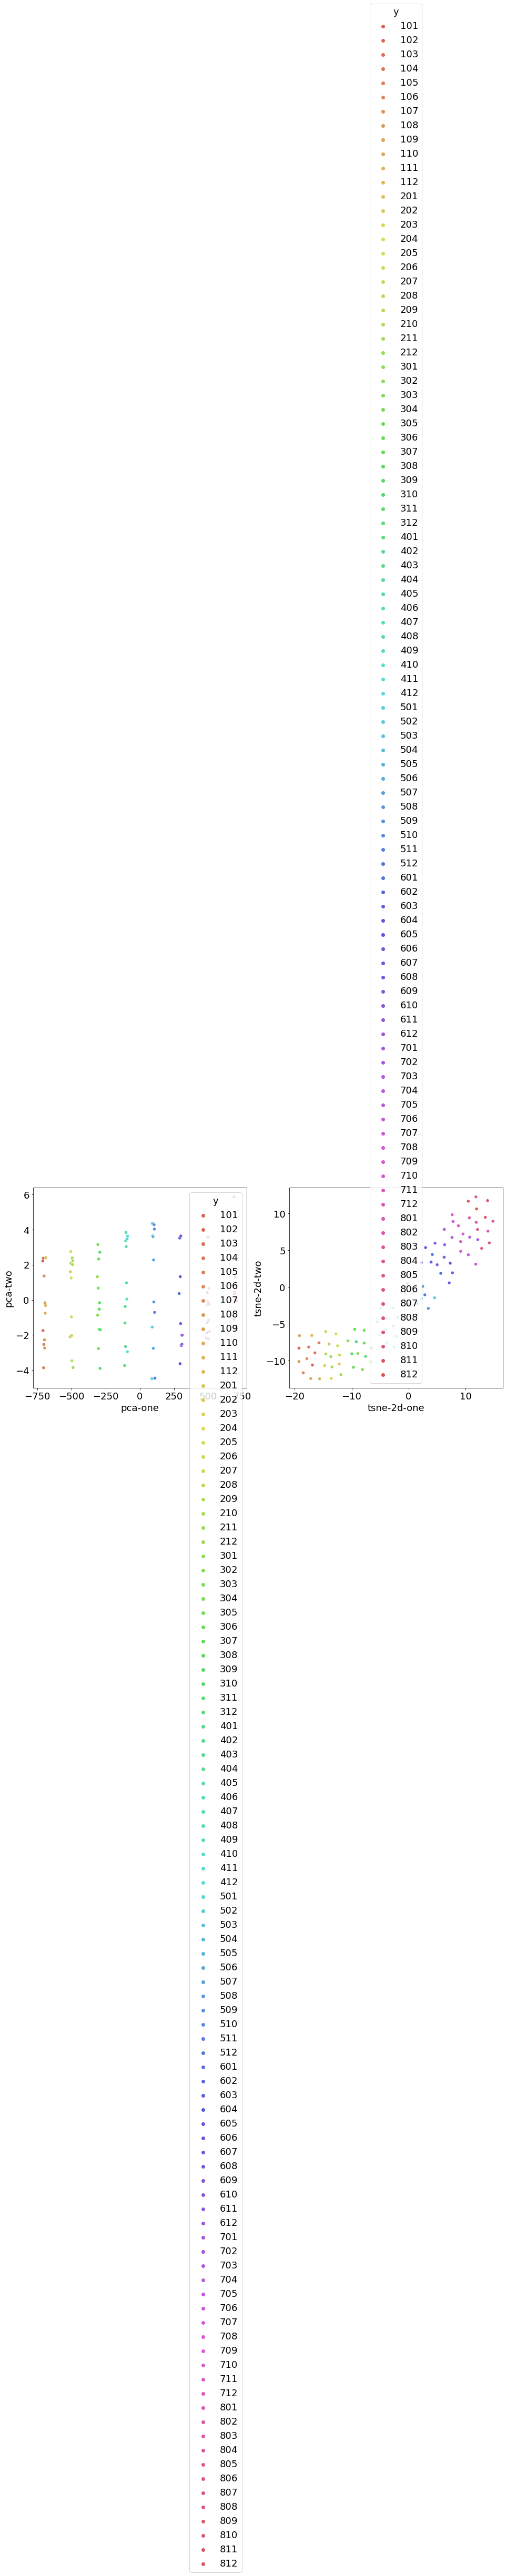

In [22]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 96),
    data=df_subset,
    alpha=1,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 96),
    data=df_subset,
    alpha=1,
    ax=ax2
)

# Tsne n_components 2>3

In [23]:
df_subset = df.copy()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_subset)

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 95 nearest neighbors...
[t-SNE] Indexed 96 samples in 0.000s...
[t-SNE] Computed neighbors for 96 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 96 / 96
[t-SNE] Mean sigma: 352.359336
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.409073
[t-SNE] KL divergence after 300 iterations: 1.741263


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

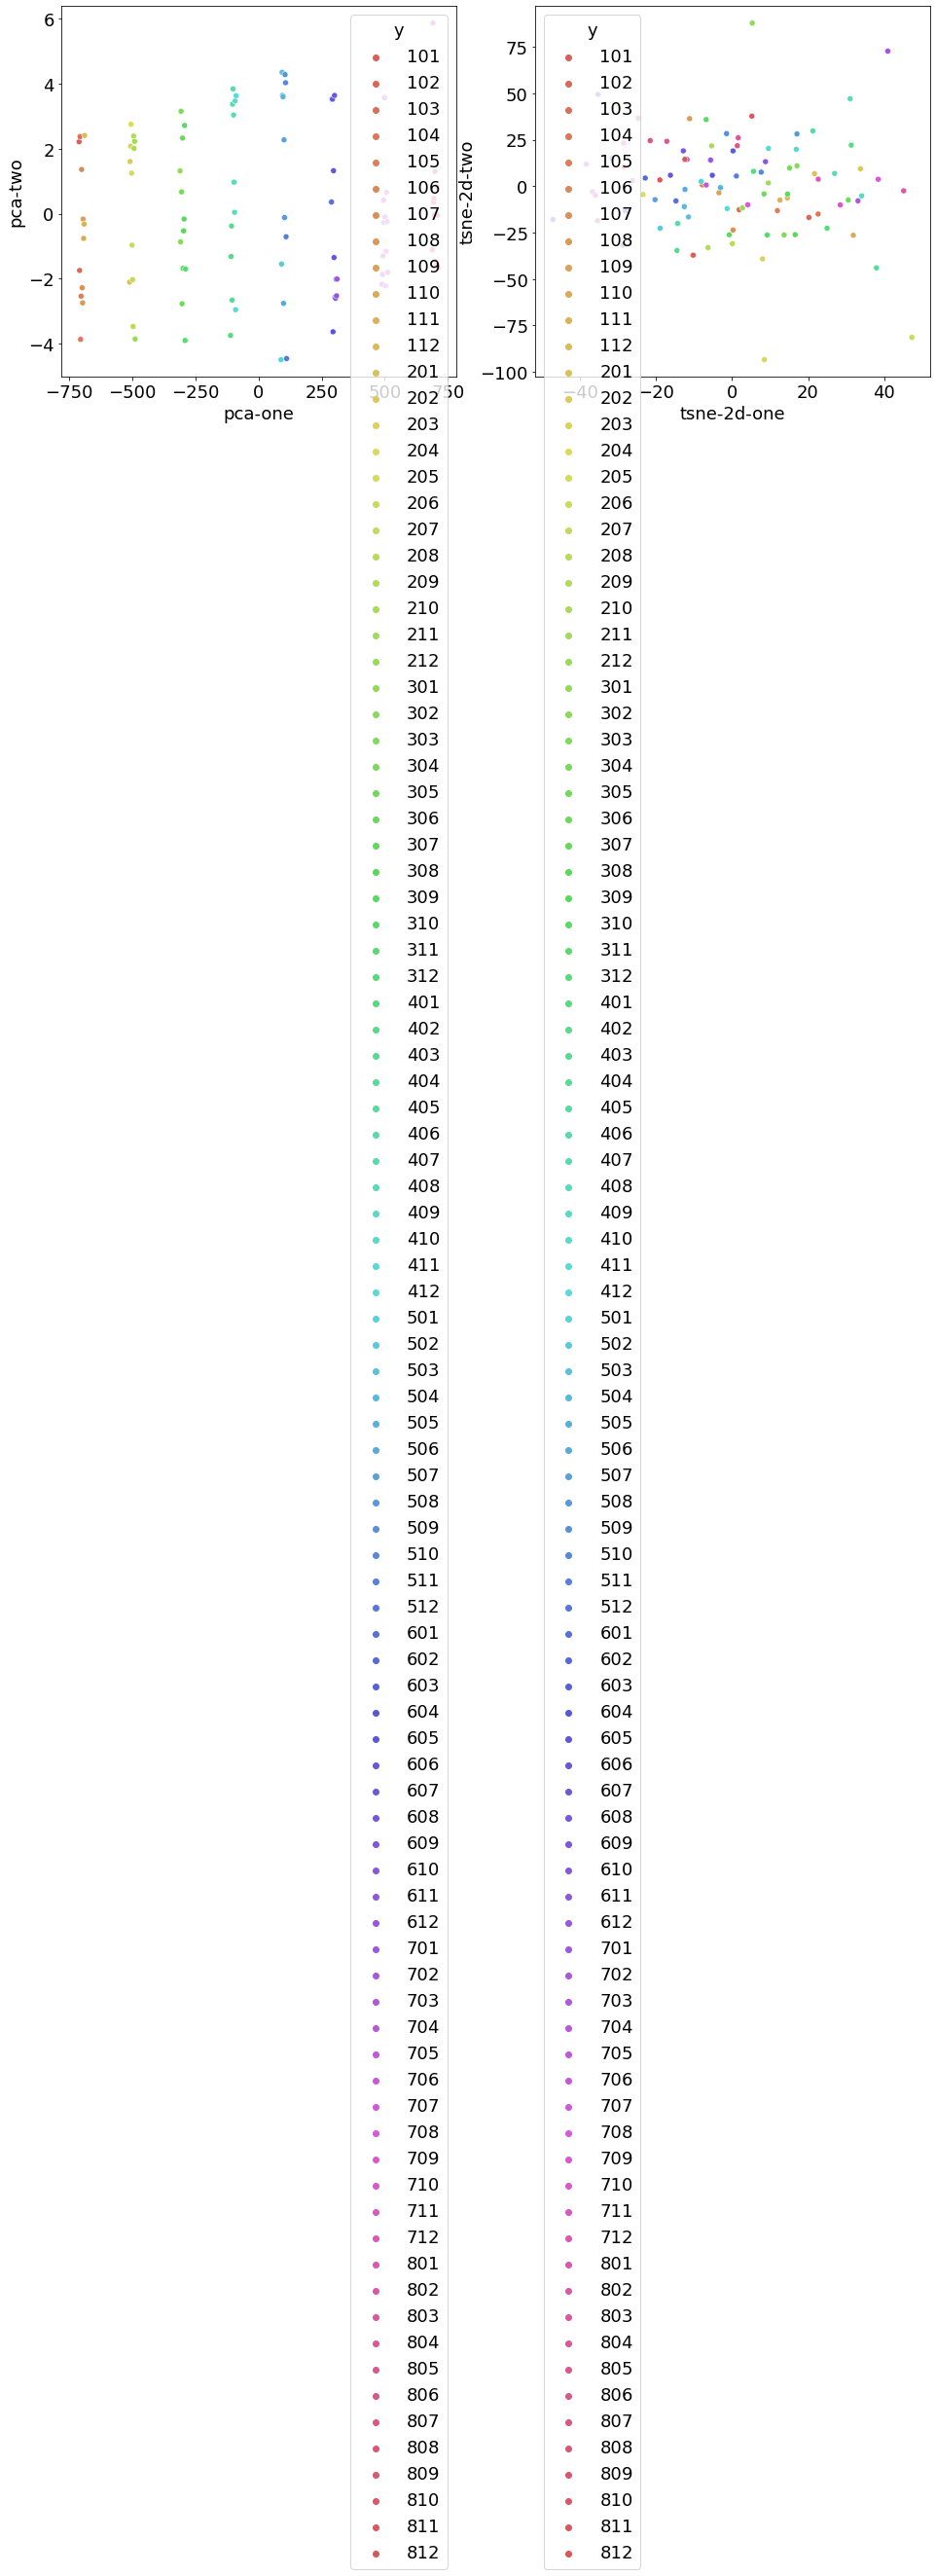

In [24]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 96),
    data=df_subset,
    alpha=1,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 96),
    data=df_subset,
    legend="full",
    alpha=1,
    ax=ax2
)